In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research Paper/Dataset/Copy of h1bdataset.csv',encoding='latin')
df.head()


,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [ ]:
df.drop('WORKSITE_STATE_FULL',inplace=True,axis=1)
df.drop('CASE_NUMBER',inplace=True,axis=1)
df.drop('YEAR',inplace=True,axis=1)
df.drop('WORKSITE_CITY',inplace=True,axis=1)
df.drop('WORKSITE_STATE_ABB',inplace=True,axis=1)
df.drop('SOC_CODE',inplace=True,axis=1)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES, PENNSYLVANIA"
1,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",QUALITY ASSURANCE ANALYST,Y,58282.0,"CAMP HILL, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SR. SOFTWARE DEVELOPER,Y,84906.0,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,VIDEO EDITOR,Y,39333.0,"AUBURN, NEW YORK"
4,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SYSTEMS ADMINISTRATOR,Y,68638.0,"BETHPAGE, NEW YORK"


In [ ]:
df.drop(df.index[(df["CASE_STATUS"] == "WITHDRAWN")],axis=0,inplace=True)
df.drop(df.index[(df["CASE_STATUS"] == "CERTIFIED-WITHDRAWN")],axis=0,inplace=True)

In [ ]:
print('WITHDRAWN' in set(df['CASE_STATUS']))

False


In [ ]:
print('CERTIFIED-WITHDRAWN' in set(df['CASE_STATUS']))

False


In [ ]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SR. SOFTWARE DEVELOPER,Y,84906.0,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,VIDEO EDITOR,Y,39333.0,"AUBURN, NEW YORK"
5,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,Y,61901.0,"TROY, MICHIGAN"
7,CERTIFIED,LIANG LLC,FINANCIAL ANALYSTS,FINANCIAL ANALYST,N,49108.8,"CARBONDALE, ILLINOIS"


In [ ]:
dff=df.dropna()


In [ ]:
dff.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

In [ ]:
Q1 = np.percentile(dff['PREVAILING_WAGE'] , 25)
Q3 = np.percentile(dff['PREVAILING_WAGE'] , 75)

In [ ]:

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

In [ ]:
outliers = dff['PREVAILING_WAGE'][(dff['PREVAILING_WAGE'] > ul) | (dff['PREVAILING_WAGE'] < ll)]
outliers

53        170394.0
902       133515.0
2540      205650.0
3545      129355.0
3601      179254.0
            ...   
856976    131893.0
856981    131893.0
856984    131893.0
856985    131893.0
857191    161220.8
Name: PREVAILING_WAGE, Length: 32303, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE'>

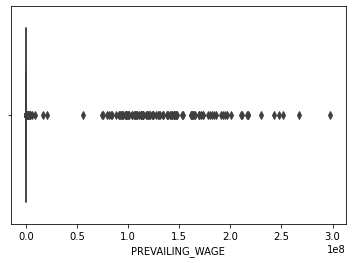

In [ ]:

sns.boxplot(dff["PREVAILING_WAGE"])

In [ ]:
dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  >ul, ul,dff["PREVAILING_WAGE"] )
dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  <ll, ll,dff["PREVAILING_WAGE"] )

<ipython-input-16-e36e83086bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  >ul, ul,dff["PREVAILING_WAGE"] )
<ipython-input-16-e36e83086bfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  <ll, ll,dff["PREVAILING_WAGE"] )


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE'>

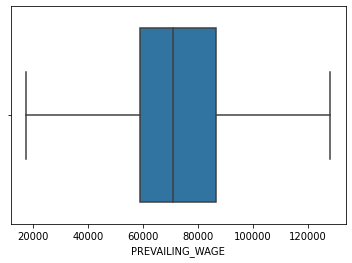

In [ ]:
sns.boxplot(dff["PREVAILING_WAGE"])

In [ ]:
dff.skew(axis=0,skipna=True)

<ipython-input-18-45d893576406>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dff.skew(axis=0,skipna=True)


PREVAILING_WAGE    0.686029
dtype: float64

In [ ]:

dff.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
dff.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

In [ ]:
dff['CASE_STATUS'].value_counts()

CERTIFIED    765088
DENIED        11758
Name: CASE_STATUS, dtype: int64

In [ ]:

(dff['CASE_STATUS'].value_counts()) / len(df) * 100

CERTIFIED    98.483401
DENIED        1.513509
Name: CASE_STATUS, dtype: float64

In [ ]:
sdf=pd.DataFrame(dff[dff['CASE_STATUS'] == 'CERTIFIED'])

In [ ]:
sdf.count()

CASE_STATUS           765088
EMPLOYER_NAME         765088
SOC_NAME              765088
JOB_TITLE             765088
FULL_TIME_POSITION    765088
PREVAILING_WAGE       765088
WORKSITE              765088
dtype: int64

In [ ]:
sdf.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SR. SOFTWARE DEVELOPER,Y,84906.0,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,VIDEO EDITOR,Y,39333.0,"AUBURN, NEW YORK"
5,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,Y,61901.0,"TROY, MICHIGAN"
7,CERTIFIED,LIANG LLC,FINANCIAL ANALYSTS,FINANCIAL ANALYST,N,49108.8,"CARBONDALE, ILLINOIS"


In [ ]:
rdf=pd.DataFrame(dff[dff['CASE_STATUS']=='DENIED'])

In [ ]:
rdf.count()

CASE_STATUS           11758
EMPLOYER_NAME         11758
SOC_NAME              11758
JOB_TITLE             11758
FULL_TIME_POSITION    11758
PREVAILING_WAGE       11758
WORKSITE              11758
dtype: int64

In [ ]:
fdf=rdf.groupby('FULL_TIME_POSITION', group_keys=False).apply(lambda x: x.sample(382544,replace=True))


In [ ]:
fdf.count()

CASE_STATUS           765088
EMPLOYER_NAME         765088
SOC_NAME              765088
JOB_TITLE             765088
FULL_TIME_POSITION    765088
PREVAILING_WAGE       765088
WORKSITE              765088
dtype: int64

In [ ]:
#sdf['FULL_TIME_POSITION'].value_counts()

In [ ]:
#fdf['FULL_TIME_POSITION'].value_counts()

In [ ]:
cdf= pd.concat([fdf, sdf], ignore_index=True)

In [ ]:

#ndf=dff.groupby('CASE_STATUS', group_keys=False).apply(lambda x: x.sample(11758))

In [ ]:
cdf.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,DENIED,"CTLS, LLC D/B/A MEDICAL KNOWLEDGE SHARED SERVICES",ACCOUNTANTS AND AUDITORS,CORPORATE ACCOUNTANT,N,55370.0,"NEW YORK, NEW YORK"
1,DENIED,"BRIGADE MARKETING, LLC",ADVERTISING AND PROMOTIONS MANAGERS,SOCIAL MEDIA MANAGER,N,50000.0,"NEW YORK, NEW YORK"
2,DENIED,ACCENZ LLC,COMPUTER SYSTEMS ANALYSTS,SYSTEMS ANALYST,N,51979.0,"TROY, MICHIGAN"
3,DENIED,"FORD MODELS, INC.",MODELS,FASHION MODEL,N,48006.4,"NEW YORK, NEW YORK"
4,DENIED,BLUE IVY NYC INTERNATIONAL GROUP INC.,"LEGAL SUPPORT WORKERS, ALL OTHER",LEGAL SUPPORT,N,52561.6,"NEW YORK, NEW YORK"


In [ ]:
cdf['CASE_STATUS'].value_counts()

DENIED       765088
CERTIFIED    765088
Name: CASE_STATUS, dtype: int64

In [ ]:
(cdf['CASE_STATUS'].value_counts()) / len(cdf) * 100

DENIED       50.0
CERTIFIED    50.0
Name: CASE_STATUS, dtype: float64

In [ ]:
cdf.skew(axis=0,skipna=True)

<ipython-input-37-6514f21e909b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cdf.skew(axis=0,skipna=True)


PREVAILING_WAGE    0.703159
dtype: float64

In [ ]:
for x in cdf.columns:
    #prinfting unique values
    print(x ,':', len(cdf[x].unique()))

CASE_STATUS : 2
EMPLOYER_NAME : 68148
SOC_NAME : 1073
JOB_TITLE : 105767
FULL_TIME_POSITION : 2
PREVAILING_WAGE : 18763
WORKSITE : 7054


In [ ]:
cdf['CASE_STATUS'].replace(['CERTIFIED', 'DENIED'],[1, 0], inplace=True)
cdf['FULL_TIME_POSITION'].replace(['Y', 'N'],[1, 0], inplace=True)

In [ ]:
cdf.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,0,"CTLS, LLC D/B/A MEDICAL KNOWLEDGE SHARED SERVICES",ACCOUNTANTS AND AUDITORS,CORPORATE ACCOUNTANT,0,55370.0,"NEW YORK, NEW YORK"
1,0,"BRIGADE MARKETING, LLC",ADVERTISING AND PROMOTIONS MANAGERS,SOCIAL MEDIA MANAGER,0,50000.0,"NEW YORK, NEW YORK"
2,0,ACCENZ LLC,COMPUTER SYSTEMS ANALYSTS,SYSTEMS ANALYST,0,51979.0,"TROY, MICHIGAN"
3,0,"FORD MODELS, INC.",MODELS,FASHION MODEL,0,48006.4,"NEW YORK, NEW YORK"
4,0,BLUE IVY NYC INTERNATIONAL GROUP INC.,"LEGAL SUPPORT WORKERS, ALL OTHER",LEGAL SUPPORT,0,52561.6,"NEW YORK, NEW YORK"


In [ ]:
matrix = cdf.corr()
print(matrix)

                    CASE_STATUS  FULL_TIME_POSITION  PREVAILING_WAGE
CASE_STATUS            1.000000            0.342506         0.166520
FULL_TIME_POSITION     0.342506            1.000000         0.347102
PREVAILING_WAGE        0.166520            0.347102         1.000000


In [ ]:
encoder= ce.BinaryEncoder(cols=['EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE'],return_df=True)
nndf=encoder.fit_transform(cdf) 
nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10,WORKSITE_11,WORKSITE_12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530171,1,0,0,1,1,0,1,1,1,0,...,1,1,0,0,0,0,1,0,1,0
1530172,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,1,1,1,0
1530173,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
1530174,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,1


In [ ]:
#ohe = OneHotEncoder()
#nndf=pd.DataFrame(ohe.fit_transform(ndf[['EMPLOYER_NAME','SOC_CODE','JOB_TITLE','WORKSITE']]))

In [ ]:
#ndf.drop('EMPLOYER_NAME',inplace=True,axis=1)
#ndf.drop('SOC_CODE',inplace=True,axis=1)
#ndf.drop('WORKSITE',inplace=True,axis=1)
#ndf.drop('JOB_TITLE',inplace=True,axis=1)

In [ ]:
#nnndf=ndf.join(nndf, lsuffix='suffix_name', rsuffix='suffix_name')

In [ ]:
#nnndf.drop('EMPLOYER_NAME',inplace=True,axis=1)
#nnndf.drop('SOC_CODE',inplace=True,axis=1)
#nnndf.drop('WORKSITE',inplace=True,axis=1)
#nnndf.drop('JOB_TITLE',inplace=True,axis=1)
#print(nndf.FULL_TIME_POSITION)
nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10,WORKSITE_11,WORKSITE_12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530171,1,0,0,1,1,0,1,1,1,0,...,1,1,0,0,0,0,1,0,1,0
1530172,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,1,1,1,0
1530173,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
1530174,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,1


In [ ]:

minmax_scaler = MinMaxScaler()
#nndf['PREVAILING_WAGE']= minmax_scaler.fit_transform(nndf['PREVAILING_WAGE'])
nndf['PREVAILING_WAGE']= minmax_scaler.fit_transform(nndf[['PREVAILING_WAGE']])
##nnndf[['PREVAILING_WAGE']]= minmax_scaler.fit_transform(nnndf[['PREVAILING_WAGE']])


In [ ]:

nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10,WORKSITE_11,WORKSITE_12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530171,1,0,0,1,1,0,1,1,1,0,...,1,1,0,0,0,0,1,0,1,0
1530172,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,1,1,1,0
1530173,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
1530174,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,1


In [ ]:

Y=pd.DataFrame(nndf['CASE_STATUS'])

In [ ]:
print(Y)

         CASE_STATUS
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
1530171            1
1530172            1
1530173            1
1530174            1
1530175            1

[1530176 rows x 1 columns]


In [ ]:
nndf.drop('CASE_STATUS',inplace=True,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
nndf_train,nndf_test,Y_train,Y_test=train_test_split(nndf,Y,test_size=0.2)


In [ ]:
"""
import tensorflow as tf
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
#ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))"""

"\nimport tensorflow as tf\n# Initializing the ANN\nann = tf.keras.models.Sequential()\n# Add the input layer and first hidden layer\n#ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))\nann.add(tf.keras.layers.Dense(units=1024, activation='relu'))\nann.add(tf.keras.layers.Dense(units=512, activation='relu'))\n# Add the second hidden layer\nann.add(tf.keras.layers.Dense(units=128, activation='relu'))\n\nann.add(tf.keras.layers.Dense(units=64, activation='relu'))\n\nann.add(tf.keras.layers.Dense(units=32, activation='relu'))\n# Add the output layer\nann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,History
from keras import backend as K
from keras.models import Model
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1024,activation='relu'))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',recall,f1_score,precision])
history = model.fit(nndf_train, Y_train,batch_size=450, validation_data=(nndf_test,Y_test),epochs=100,callbacks=EarlyStopping(monitor='val_loss',verbose=1,min_delta=0.0001,patience=60))

Epoch 1/100
2721/2721 [==============================] - 24s 6ms/step - loss: 0.1889 - accuracy: 0.9230 - recall: 0.8999 - f1_score: 0.9205 - precision: 0.9437 - val_loss: 0.1346 - val_accuracy: 0.9511 - val_recall: 0.9262 - val_f1_score: 0.9500 - val_precision: 0.9752
Epoch 2/100
2721/2721 [==============================] - 17s 6ms/step - loss: 0.1147 - accuracy: 0.9600 - recall: 0.9447 - f1_score: 0.9592 - precision: 0.9744 - val_loss: 0.1056 - val_accuracy: 0.9636 - val_recall: 0.9510 - val_f1_score: 0.9632 - val_precision: 0.9759
Epoch 3/100
2721/2721 [==============================] - 16s 6ms/step - loss: 0.0969 - accuracy: 0.9671 - recall: 0.9541 - f1_score: 0.9666 - precision: 0.9796 - val_loss: 0.0978 - val_accuracy: 0.9668 - val_recall: 0.9511 - val_f1_score: 0.9664 - val_precision: 0.9823
Epoch 4/100
2721/2721 [==============================] - 18s 6ms/step - loss: 0.0896 - accuracy: 0.9699 - recall: 0.9571 - f1_score: 0.9694 - precision: 0.9822 - val_loss: 0.0944 - val_accur

In [ ]:
"""from keras.callbacks import ModelCheckpoint, EarlyStopping
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(nndf_train, Y_train, batch_size = 24,callbacks=EarlyStopping(monitor='val_loss',verbose=1,patience=5))"""

"from keras.callbacks import ModelCheckpoint, EarlyStopping\nann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\nann.fit(nndf_train, Y_train, batch_size = 24,callbacks=EarlyStopping(monitor='val_loss',verbose=1,patience=5))"

In [ ]:
Y_pred = model.predict(nndf_test)
Y_pred = (Y_pred > 0.5)
pd.DataFrame(list(zip(Y_test, Y_pred)), columns=['Actual', 'Predicted'])

9564/9564 [==============================] - 17s 2ms/step


,Actual,Predicted
0,CASE_STATUS,[True]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
print(f1_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, Y_pred)

In [ ]:
print(auc)

0.9799726897860271


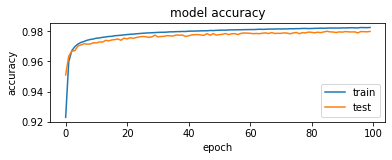

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

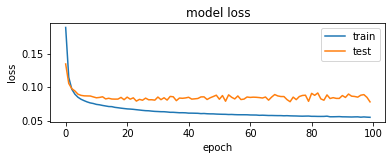

In [ ]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
auc_keras

0.9799726897860271

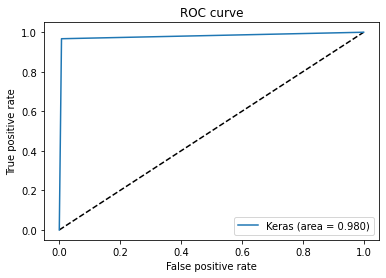

In [ ]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.


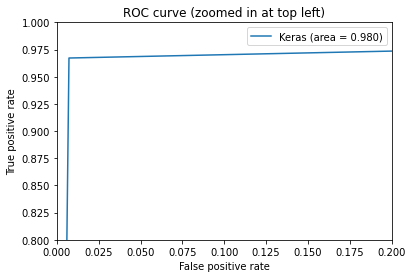

In [ ]:

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'f1_score', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_f1_score', 'val_precision'])


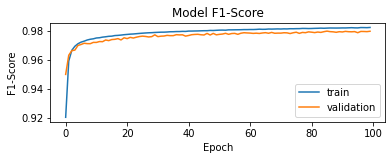

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

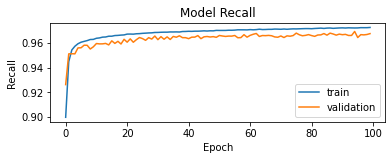

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

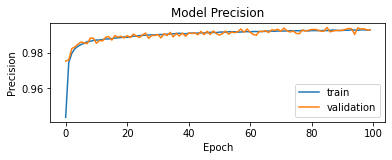

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

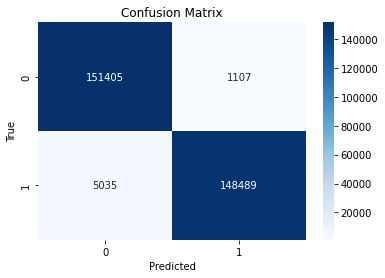

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

# Create heatmap from confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

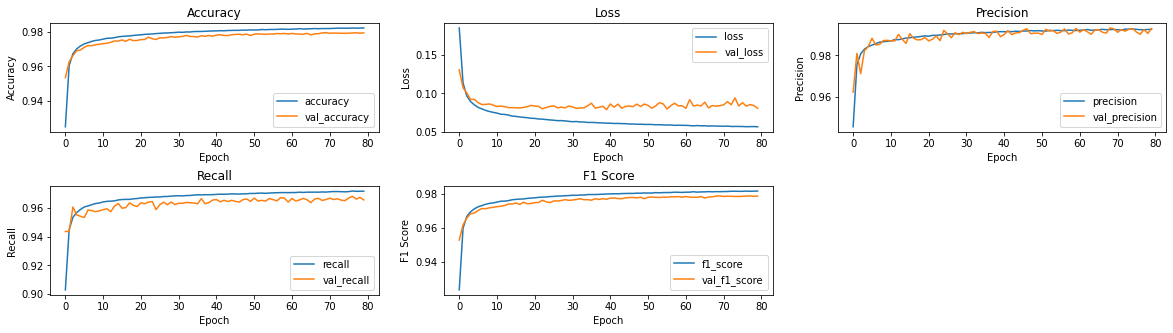

In [171]:
fig, axs = plt.subplots(2, 3, figsize=(20,5),gridspec_kw={'hspace': 0.5})

# Plot accuracy
axs[0, 0].plot(history.history['accuracy'], label='accuracy')
axs[0, 0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot loss
axs[0, 1].plot(history.history['loss'], label='loss')
axs[0, 1].plot(history.history['val_loss'], label='val_loss')
axs[0, 1].set_title('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot precision
axs[0, 2].plot(history.history['precision'], label='precision')
axs[0, 2].plot(history.history['val_precision'], label='val_precision')
axs[0, 2].set_title('Precision')
axs[0, 2].set_xlabel('Epoch')
axs[0, 2].set_ylabel('Precision')
axs[0, 2].legend()

# Plot recall
axs[1, 0].plot(history.history['recall'], label='recall')
axs[1, 0].plot(history.history['val_recall'], label='val_recall')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(history.history['f1_score'], label='f1_score')
axs[1, 1].plot(history.history['val_f1_score'], label='val_f1_score')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

# Add placeholder subplot
axs[1, 2].axis('off')

# Display the plots
plt.show()